<a href="https://colab.research.google.com/github/rushikeshlatad/Zomato-Restaurant-clustering-and-sentimental-analysis-Rushikesh-latad/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis


##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Member Name** - Rushikesh Latad

# **Project Summary -**


This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

I then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **GitHub Link -**

# **Problem Statement**

The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

# *1. Know Your Data*

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
import math
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Dataset Loading

In [2]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML project datasets/Zomato clustering and sentimental analysis/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Unsupervised ML project datasets/Zomato clustering and sentimental analysis/Zomato Restaurant reviews.csv')

Dataset First View

In [3]:
# Dataset First Look restaurant
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
# Dataset First Look review
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


Dataset Rows & Columns count

In [5]:
print('Total observation and feature for restaurant :', hotel_df.shape)
print('Total observation and feature for review :', review_df.shape)

Total observation and feature for restaurant : (105, 6)
Total observation and feature for review : (10000, 7)


Dataset Information

In [6]:
print('Restaurant info : \n')
hotel_df.info()
print('-'*50)
print('Reivew info : \n')
review_df.info()

Restaurant info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
--------------------------------------------------
Reivew info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures 

Duplicate Values

In [7]:
print('Total duplicate rows in hotel_df :', len(hotel_df[hotel_df.duplicated()]))
print('-'*50)
print('Total duplicate rows in review_df :', len(review_df[review_df.duplicated()]))

Total duplicate rows in hotel_df : 0
--------------------------------------------------
Total duplicate rows in review_df : 36


In [8]:
#lets see duplicate rows
review_df[review_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


Missing Values/Null Values

In [9]:
# percentage of Missing Values/Null Values for hotel data
hotel_df.isnull().sum()/len(hotel_df)*100

Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64

In [10]:
# percentage of Missing Values/Null Values for review data
review_df.isnull().sum()/len(review_df)*100

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

What did you know about your dataset?

Restaurant DataSet
*   There are 105 total observation with 6 different features.
*   Feature like collection and timing has null values.
*   There is no duplicate values i.e., 105 unique data.
*   Feature cost represent amount but has object data type because these values are separated by comma ','. itis needed to replace ',' with '' and change the data type.
*   Timing represent operational hour but as it is represented in the form of text has object data type it is needed to change datatype.

Review DataSet
*   There are total 10000 observation and 7 features.
*   Except picture and restaurant feature all others have null values.
*   There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
*   Rating represent ordinal data, has object data type should be integer.
*   Timing represent the time when review was posted but show object data time, it should be converted into date time.









#*2. Understanding Your Variables*

In [11]:
print('Features in hotel_df data :',hotel_df.columns.to_list())
print('Features in review_df data :',review_df.columns.to_list())


Features in hotel_df data : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features in review_df data : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [12]:
print('Discribing hotel_df dataset :')
hotel_df.describe(include='all').T

Discribing hotel_df dataset :


,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [13]:
print('Discribing review_df dataset :')
review_df.describe(include='all').T

Discribing review_df dataset :


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


*Variables Description*


**Zomato Restaurant**

- Name : Name of Restaurants

- Links : URL Links of Restaurants

- Cost : Per person estimated Cost of dining

- Collection : Tagging of Restaurants w.r.t. Zomato categories

- Cuisines : Cuisines served by Restaurants

- Timings : Restaurant Timings

**Zomato Restaurant Reviews**

- Restaurant : Name of the Restaurant

- Reviewer : Name of the Reviewer

- Review : Review Text

- Rating : Rating Provided by Reviewer

- MetaData : Reviewer Metadata - No. of Reviews and followers

- Time: Date and Time of Review

- Pictures : No. of pictures posted with review

Check Unique Values for each variable.

In [14]:
#number of unique values for each variable in hotel_df 
hotel_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [15]:
#number of unique values for each variable in review_df 
review_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

#*3. Data Wrangling*

Restaurant

In [16]:
#creating copy of both the data
hotel = hotel_df.copy()
reviews = review_df.copy()

In [17]:
# changing the data type of the cost feature
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [18]:
#checking changed dtype of cost feature 
hotel['Cost'].dtype   

dtype('int64')

In [19]:
#top 10 costlier restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][:10]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


In [20]:
#top 10 economy restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][-10:]
     

,Name,Cost
9,Cream Stone,350
7,Shah Ghouse Spl Shawarma,300
103,Wich Please,250
54,Asian Meal Box,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [21]:
hotel_df.head(1)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [22]:
#hotels that share same price
same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index().rename(columns = {'Name':'Name_of_Restaurant'})
hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values('Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending=False).head()

,Cost,Name_of_Restaurant,Total_Restaurant
7,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
9,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
11,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
18,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
16,1000,"[Hyper Local, Tiki Shack, Pista House, La La L...",6


In [23]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name_of_Restaurant,Total_Restaurant
28,2800,[Collage - Hyatt Hyderabad Gachibowli],1
27,2500,[Feast - Sheraton Hyderabad Hotel],1
26,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
24,1750,[Zega - Sheraton Hyderabad Hotel],1


In [24]:
# spliting the cusines and storing in list 
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [25]:
cuisine_value_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [26]:
#Storing all the cusine in dictinory as keys and there frequence as values
from collections import Counter
cuisine_list = []
for cuisine_name in cuisine_value_list:
  for cuisine in cuisine_name:
    cuisine_list.append(cuisine)

cuisine_dict = dict(Counter(cuisine_list))

In [27]:
cuisine_dict

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 9,
 'North Indian': 61,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Andhra': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

In [28]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number_of_Restaurants'})

In [29]:
#checking top 5 favriote cuisines 
cuisine_df.sort_values('Number_of_Restaurants', ascending=False).head()

,Cuisine,Number_of_Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [30]:
#hotel.isnull().sum()

In [31]:
# spliting the Collections and storing in list 
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [32]:
#Storing all the Collections in dictinory as keys and there frequence as values
from collections import Counter
Collections_list = []
for Collections_name in Collections_value_list:
  for Collections in Collections_name:
    Collections_list.append(Collections)

Collections_dict = dict(Counter(Collections_list))

In [33]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Collections',0:'Number_of_Restaurants'})

In [34]:
#checking top 5 favriote Collections 
Collections_df.sort_values('Number_of_Restaurants', ascending=False).head()

,Collections,Number_of_Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


Reviews

In [35]:
#Checjing data type of each column in review
reviews.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [36]:
#Checking unique value counts of rating column 
reviews.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [37]:
#replacing 'Like' value in Rating to 0
reviews.Rating.replace('Like', 0, inplace=True)

In [38]:
#changing data type for rating in review data
reviews['Rating'] = reviews['Rating'].astype('float')

In [39]:
reviews.dtypes

Restaurant     object
Reviewer       object
Review         object
Rating        float64
Metadata       object
Time           object
Pictures        int64
dtype: object

In [40]:
#replacing 0 value in Rating to median in rating column
reviews.Rating.replace(0, reviews.Rating.median(), inplace=True)

In [41]:
reviews.Rating.value_counts()

5.0    3832
4.0    2374
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [42]:
reviews.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [43]:
#Changing dtype of Time column and coverting into datetime data type and ceating new features such as year, day, dayofweek, month, hour, is weekend.
reviews['Time']=pd.to_datetime(reviews['Time'])
reviews['Review_Year'] = pd.DatetimeIndex(reviews['Time']).year
reviews['Review_Day'] = pd.DatetimeIndex(reviews['Time']).day
reviews['Review_Month'] = pd.DatetimeIndex(reviews['Time']).month
reviews['Review_Hour'] = pd.DatetimeIndex(reviews['Time']).hour
reviews['Review_Dayofweek'] = pd.DatetimeIndex(reviews['Time']).dayofweek
reviews["is_weekend"]=reviews["Review_Dayofweek"].apply( lambda x : 1 if x  in [5,6] else 0 )  #0 is considerd as monday hence 5 and 6 are weekends

In [44]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Day,Review_Month,Review_Hour,Review_Dayofweek,is_weekend
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,2019.0,25.0,5.0,15.0,5.0,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,2019.0,25.0,5.0,14.0,5.0,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2019.0,24.0,5.0,22.0,4.0,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,2019.0,24.0,5.0,22.0,4.0,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,2019.0,24.0,5.0,21.0,4.0,0


In [45]:
#checking most engaging years
reviews['Review_Year'].value_counts()

2018.0    4903
2019.0    4803
2017.0     213
2016.0      43
Name: Review_Year, dtype: int64

In [46]:
#checking value counts for the weekdays and weekends
reviews['is_weekend'].value_counts()

0    6436
1    3564
Name: is_weekend, dtype: int64

In [47]:
#creating new column by spliting metadata in reviews column.
reviews['Reviewer_Total_Review'],reviews['Reviewer_Followers']=reviews['Metadata'].str.split(',').str
reviews['Reviewer_Total_Review'] = pd.to_numeric(reviews['Reviewer_Total_Review'].str.split(' ').str[0])
reviews['Reviewer_Followers'] = pd.to_numeric(reviews['Reviewer_Followers'].str.split(' ').str[1])

In [48]:
reviews.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Day,Review_Month,Review_Hour,Review_Dayofweek,is_weekend,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,2019.0,25.0,5.0,15.0,5.0,1,1.0,2.0


In [49]:
#Average engagement of restaurants
avg_hotel_rating = reviews.groupby('Restaurant').agg({'Rating':'mean', 'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [50]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
3,AB's - Absolute Barbecues,4.88,100
11,B-Dubs,4.81,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
67,Paradise,4.70,100
35,Flechazo,4.66,100


In [51]:
#top 5 least engaging or lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
41,Hotel Zara Hi-Fi,2.400,100
10,Asian Meal Box,2.580,100
66,Pakwaan Grand,2.710,100
57,Mathura Vilas,2.820,100
14,Behrouz Biryani,2.825,100


In [52]:
most_followed_reviewer = reviews.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
                                                          'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
                                                              'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5463,Satwinder Singh,186.0,13410.0,3.666667
1701,Eat_vth_me,60.0,13320.0,5.000000
5235,Samar Sardar,8.0,11329.0,3.500000
1787,Foodies Hyderabad,31.0,9494.0,4.500000
6229,Srinivas,34.0,7628.0,3.714286


In [53]:
#merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})   
merged = hotel.merge(reviews, on = 'Restaurant')
merged.shape

(10000, 20)

In [54]:
merged.head(1)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Day,Review_Month,Review_Hour,Review_Dayofweek,is_weekend,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,2019.0,25.0,5.0,15.0,5.0,1,1.0,2.0


In [55]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean', 'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [56]:
#Top 5 highest rated hotel and there price point
price_point.sort_values('Rating', ascending =False)[ :5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [57]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


In [58]:
#rating count by reviewer
rating_count_df = pd.DataFrame(reviews.groupby('Reviewer').size(), columns=["Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Parijat Ray,13
Ankita,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives and average of 3.67 rating for each order he makes. I also found in year 2018 4903 hotels got reviews.

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

#*4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

Chart - 1 Distplot for Distribution

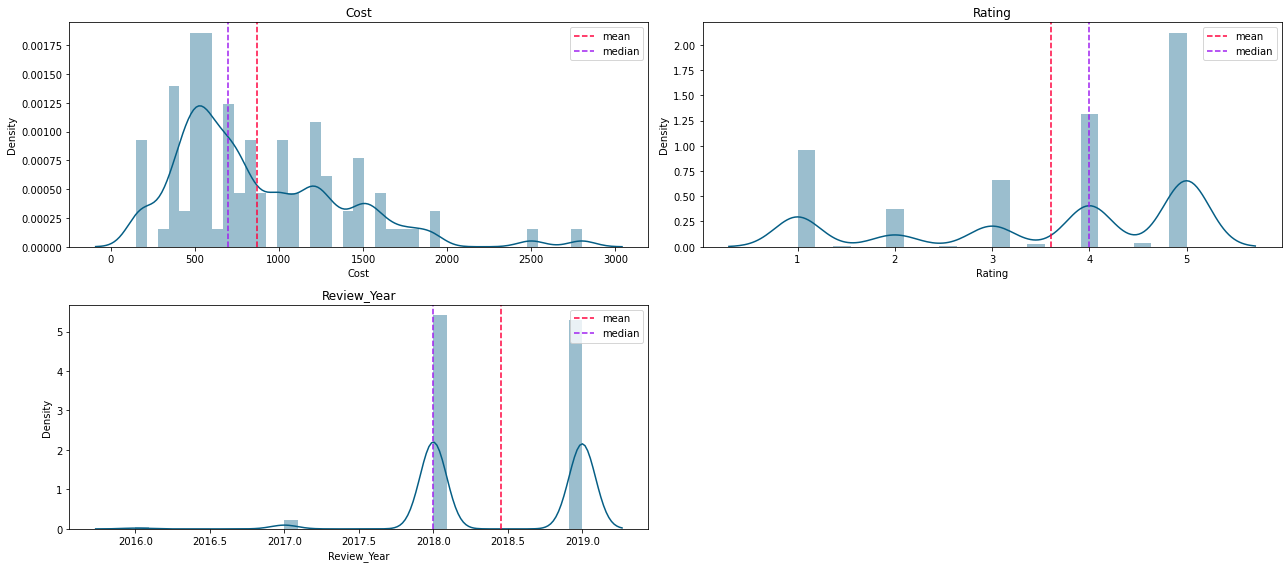

In [59]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));

for i,col in enumerate(['Cost','Rating','Review_Year']) :
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85');
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed',label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed' ,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


**1. Why did you pick the specific chart?**
- Distplot is helpful in understanding the distribution of the feature.

**2. What is/are the insight(s) found from the chart?**
- All three are show skewness.
- Maximum restaurant show price range for 500.
- In 2018 number of reviews are more.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

- Price always place important role in any business alongwith rating which show how much engagement are made for the product.

- But in this chart it is unable to figure any impact on business when plotted all alone.

**Price Point and Maximum Engagement**

Chart - 2 Maximum Engagement and Lowest Engagement

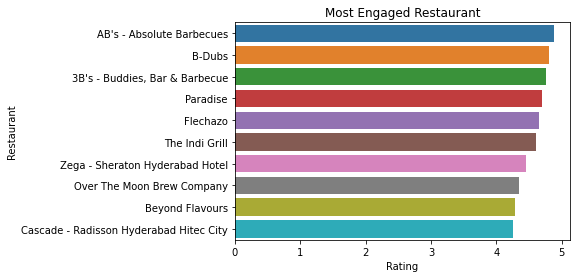

In [60]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()     

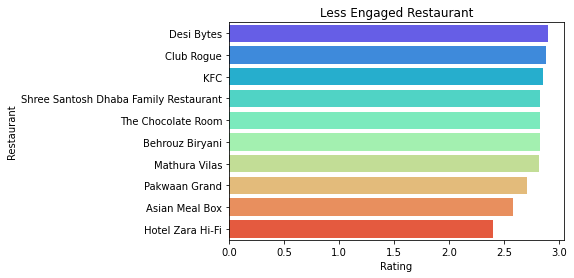

In [61]:
#chart for less liked hotels
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant', palette='rainbow')
plt.title('Less Engaged Restaurant')
plt.show()

*1. Why did you pick the specific chart?*

I picked barplot for the above graph because it show frequency level for different category.

*2. What is/are the insight(s) found from the chart?*

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

*3. Will the gained insights help creating a positive business impact?*


Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights gives idea about the most loved restaurant according to the customers rating. This insights can be useful in reccomendations of most loved and highly rated restaurants.

Some restaurant show less rating which can show negative growth if not monitored propely. For example KFC is in low rated restaurant the major reson behind this low rating could bethe outlet of kfc is not providing good service. This things has to be monitored.


*Chart - 3 Price Point for High Rated and Low Rated Hotels*

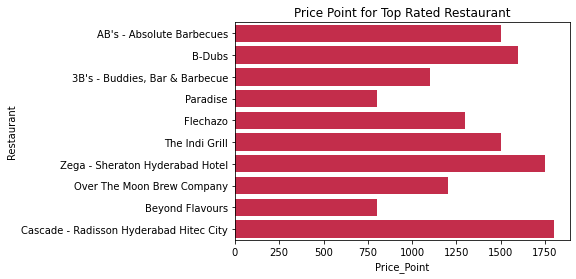

In [62]:
# Chart - 3 visualization code for price point of high rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant', color='#dc143c')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

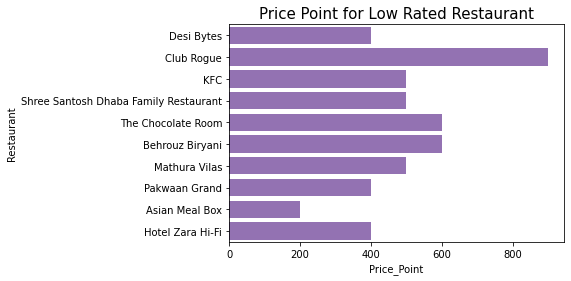

In [63]:
#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', y = 'Restaurant',color = '#9467bd')
plt.title('Price Point for Low Rated Restaurant', size = 15)
plt.show()

**1. Why did you pick the specific chart?**

I picked barplot for the above graph because it show frequency level for different category.

**2. What is/are the insight(s) found from the chart?**

Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.

Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.

However it can not be finalized that this hotel should unlisted as there may be chance of different cuisine they both serve and it also depend upon the locality they both serve, therefore based on that small promotional offers can also be given for low rated restaurant to increase sales.

**Chart - 4 Proportion of Cuisine Sold by Most Restaurant**

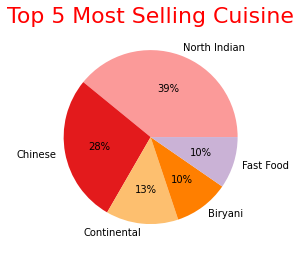

In [64]:
# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Number_of_Restaurants'].tolist()[:5]
cuisine_list = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Cuisine'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'Red')
plt.show()

**1. Why did you pick the specific chart?**

Here I choose to use pie chart because it show proportion of each quantity.

**2. What is/are the insight(s) found from the chart?**

Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.

However, these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. This chart does not give information about market trends, economic conditions and other factors that can impact the business, it's important for Zomato to consider other data and information when making strategic decisions.

**Chart - 5 Most used Tags**


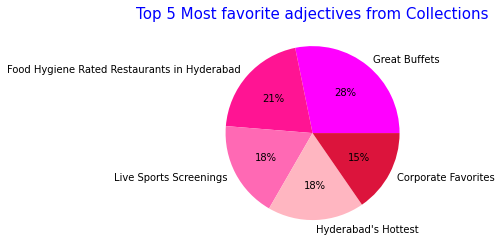

In [65]:
# Chart - 5 visualization code pie chart for top 5 mpst selling cuisine
data = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Number_of_Restaurants'].tolist()[:5]
collection_list = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Collections'].tolist()[:5]
labels = collection_list

#create pie chart
plt.pie(data, labels = labels, colors = ["#ff00ff", "#ff1493", "#ff69b4",'#ffb6c1','#dc143c'], autopct='%.0f%%')
plt.title('Top 5 Most favorite adjectives from Collections', size =15, color= 'blue')
plt.show()

**1. Why did you pick the specific chart?**

The pie chart provides a clear and simple way to see the proportion of different attributes.

**2. What is/are the insight(s) found from the chart?**

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Plotting a pie chart of Collections used to describe food can help a restaurant review and food delivery platform Zomato to identify the most popular adjectives used to describe the food. This information can be used to make strategic decisions about which food attributes to focus on promoting and expanding. For example, if a significant portion of customers are describing the restaurants as 'Great Buffets' or 'Hygine Restaurant', Zomato could focus on adding more restaurants that are known for their Graeat Buffets and Hygine food and promoting them to customers.

However, it's important to note that these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain adjective is popular does not tell us about the profitability of that adjective or the competition in that category. 

**Chart - 6 Popular Reviewers**

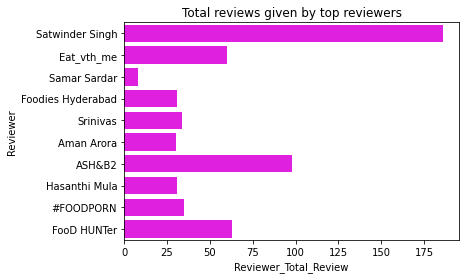

In [66]:
# Chart - 6 visualization code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review', y = 'Reviewer', color='#ff00ff')
plt.title('Total reviews given by top reviewers')
plt.show()

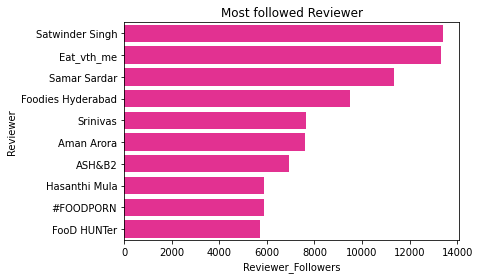

In [67]:
# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', y = 'Reviewer', color='#ff1493')
plt.title('Most followed Reviewer')
plt.show()

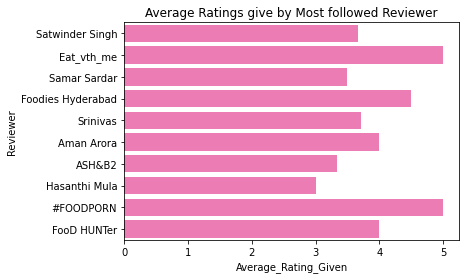

In [68]:
# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', y = 'Reviewer', color='#ff69b4')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

**1. Why did you pick the specific chart?**

Barplot helps in understanding the frequency of rating, follower and total reviews with respect to reviewer.

**2. What is/are the insight(s) found from the chart?**

Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating e has given more than 175 reviews.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

**Chart - 7 Hotel with Highest Price and Lowest Price**

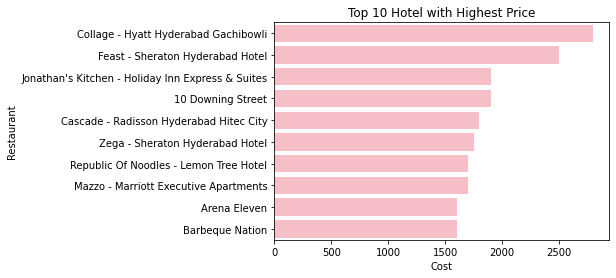

In [69]:
# Chart - 7 visualization code for howtel with maximum price
price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', color = '#ffb6c1')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

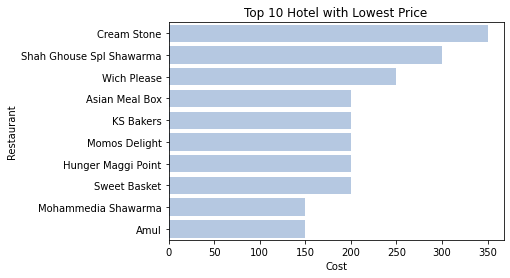

In [70]:
#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', color = '#aec7e8')
plt.title('Top 10 Hotel with Lowest Price')
plt.show()

In [71]:
#merging average rating and cost to find rating for expensive hotel
hotel_with_avg_rating = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')

In [72]:
hotel_with_avg_rating.head()

,Restaurant,Rating,Total_Review,Cost
0,10 Downing Street,3.80,100,1900
1,13 Dhaba,3.48,100,450
2,"3B's - Buddies, Bar & Barbecue",4.76,100,1100
3,AB's - Absolute Barbecues,4.88,100,1500
4,Absolute Sizzlers,3.62,100,750


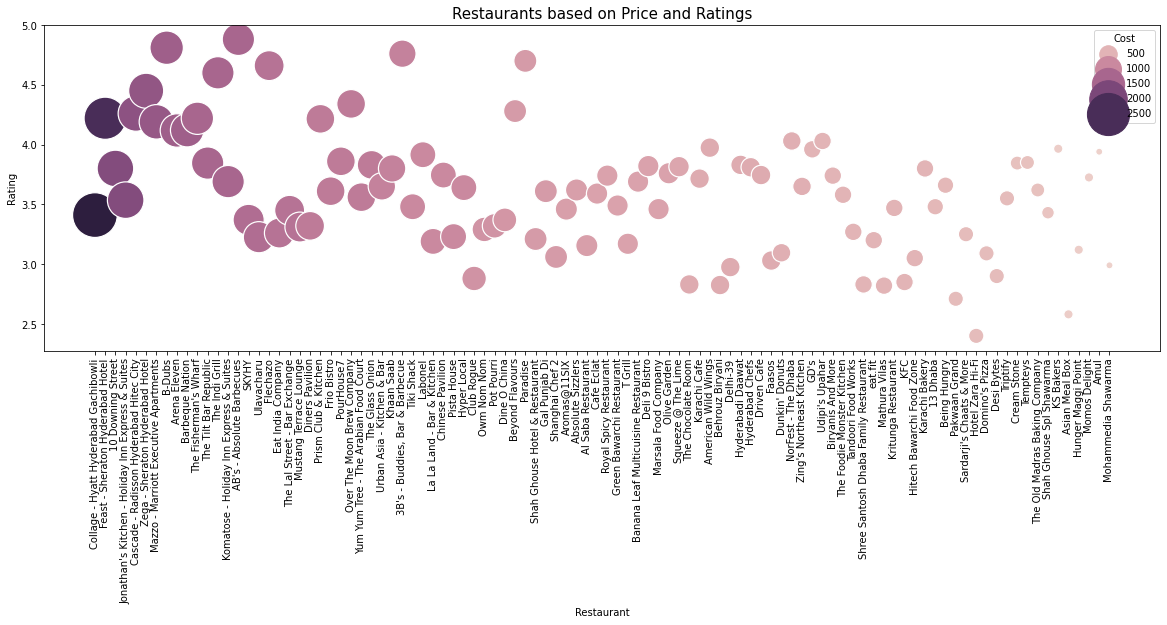

In [73]:
#chart for rating based on price and hotel
plt.figure(figsize=(20,6))
data = hotel_with_avg_rating.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", hue = 'Cost',legend=True, sizes=(50, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings', size=15)
plt.show()

**1. Why did you pick the specific chart?**

With the help sctterplot it is easy to visualize the corilation between three features, by puting two on two axes and one as size or hue.

**2. What is/are the insight(s) found from the chart?**

All the restaurants whose rating is more than 4 has price more than or near to 1500, and most tthe less expensive estaurants have average ration is more than 3. There are some restaurants whose cost is high but they dont comes under highly rated resturants for example Collage - Hyatt Hyderabad Gachibowli has rating of 3.4 and cost is more than 2500, Jonathan's Kitchen - Holiday Inn Express & Suites	has rating of 3.5 and cost is 1900, and there are some restaurants whose cost is very less but rating is good like Momos Delight has rating of 3.7 and cost is only 200, KS Bakers rating is 3.96 and cost is just 200 and many more.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

This scatter plot could help zomato to recommend cheap hotels with good rating.For food delivery platform Zomato, it is very important to focus and improve sales based on these hotels. For the niche market consumer zomato can also recommend the hotels which are high cost high rating.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However gives beer understand of the cost and rating.



**Chart - 8 - Correlation Heatmap**

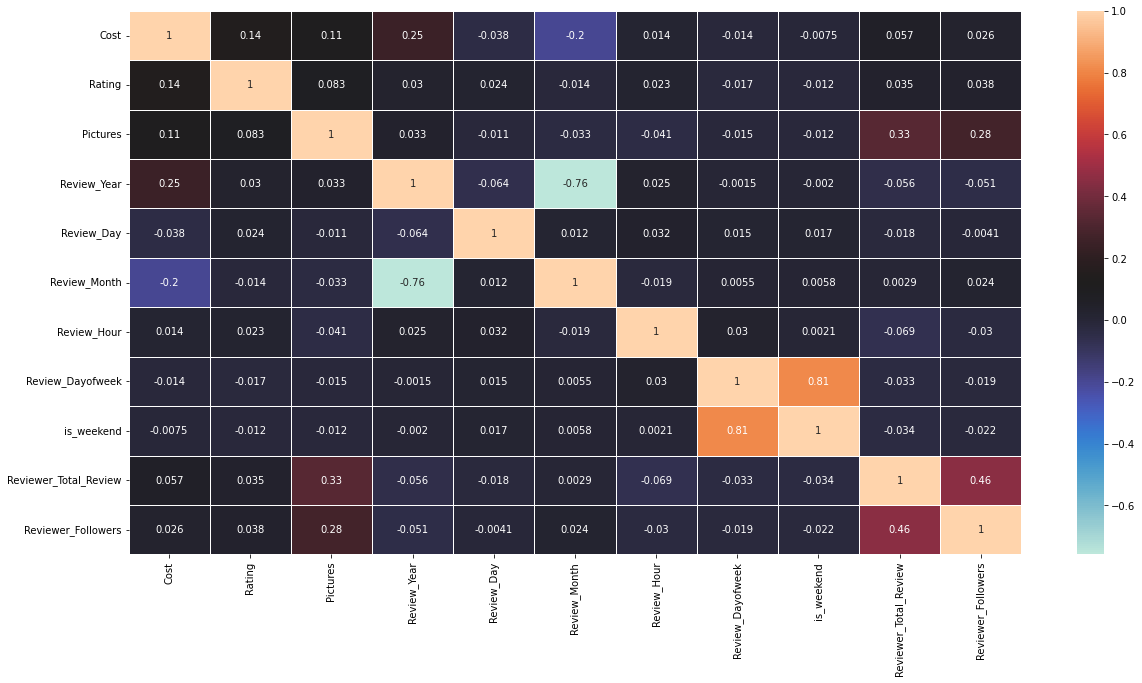

In [74]:
# Correlation Heatmap visualization code
plt.subplots(figsize = (20, 10))
sns.heatmap(merged.corr(), annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

**1. Why did you pick the specific chart?**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

**2. What is/are the insight(s) found from the chart?**

From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures, then reviewer dayofweek is corilated with is_weekednd.

#*5. Hypothesis Testing*

**Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**



*   Cost is positively corrilated with rating, as the cost increases rating also increases
*   Restaurants with more reviews will have high rating. 
*   Restaurants that offer a wider variety of cuisines will have a higher rating.
 





###Hypothetical Statement - 1

Cost is positively corrilated with rating, as the cost increases rating also increases

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
- Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
- Test : Simple Linear Regression Analysis

2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
print('p_value :', p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")


p_value : 4.796097271723646e-47
Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


**Which statistical test have you done to obtain P-Value?**

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating.

**Why did you choose the specific statistical test?**

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

###Hypothetical Statement - 2

Restaurants that offer a wider variety of cuisines will have a higher rating.

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
- Null Hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽 = 0)
- Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
- Test : Chi-Squared Test

2. Perform an appropriate statistical test.

In [76]:
pd.crosstab(merged['Cuisines'], merged['Rating'])


Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88
"American, Chinese, North Indian, Kebab, South Indian",18,0,4,0,14,0,24,0,40
"American, Fast Food, Salad, Burger",10,0,4,0,6,0,15,0,42
"American, Wraps, Desserts",14,0,7,0,19,0,27,0,33
"Andhra, Biryani, Hyderabadi, North Indian",24,0,8,0,8,0,17,0,43
...,...,...,...,...,...,...,...,...,...
"North Indian, South Indian",23,0,4,0,6,0,10,0,57
"Seafood, Goan, North Indian, Continental, Asian",5,0,5,0,5,0,33,0,52
"South Indian, North Indian, Chinese",44,0,13,0,26,0,48,0,69


In [77]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


**Which statistical test have you done to obtain P-Value?**

For this hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

**Why did you choose the specific statistical test?**

In this hypothesis, the chi-squared test is used because the variables being analyzed are both categorical variables, and the chi-squared test is specifically designed to analyze the relationship between categorical variables.

#*6. Feature Engineering & Data Pre-processing*

**1. Handling Missing Values**

Restaurant Dataset

In [78]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [79]:
#checking the null value in timing
hotel[hotel['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [80]:
#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [81]:
#checking percentage of null values in Collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [82]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [83]:
#final checking of missing value
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

Review Dataset

In [84]:
#review missing value
reviews.isnull().sum()

Restaurant                  0
Reviewer                   38
Review                     45
Rating                     38
Metadata                   38
Time                       38
Pictures                    0
Review_Year                38
Review_Day                 38
Review_Month               38
Review_Hour                38
Review_Dayofweek           38
is_weekend                  0
Reviewer_Total_Review      38
Reviewer_Followers       1616
dtype: int64

In [85]:
#checking null reviewer
reviews[reviews['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Year,Review_Day,Review_Month,Review_Hour,Review_Dayofweek,is_weekend,Reviewer_Total_Review,Reviewer_Followers
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [86]:
# dropping null values in reviewer column as all values are null for those column
reviews = reviews.dropna(subset=['Reviewer'])

In [87]:
# again checking null values
reviews.isnull().sum()

Restaurant                  0
Reviewer                    0
Review                      7
Rating                      0
Metadata                    0
Time                        0
Pictures                    0
Review_Year                 0
Review_Day                  0
Review_Month                0
Review_Hour                 0
Review_Dayofweek            0
is_weekend                  0
Reviewer_Total_Review       0
Reviewer_Followers       1578
dtype: int64

In [88]:
#filling null values in review and reviewer follower column
reviews = reviews.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [89]:
# final checking null values
reviews.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Review_Year              0
Review_Day               0
Review_Month             0
Review_Hour              0
Review_Dayofweek         0
is_weekend               0
Reviewer_Total_Review    0
Reviewer_Followers       0
dtype: int64

In [90]:
#merging both dataset
merged = hotel.merge(reviews, on = 'Restaurant')
merged.shape

(9962, 19)

In [91]:
#deleting duplicate value from merged dataset
merged = merged.drop_duplicates()

In [92]:
merged.shape

(9962, 19)

**What all missing value imputation techniques have you used and why did you use those techniques?**

First I check the sum of null values in each column in hotel dataset, where I found 1 null value in 'Timinigs' column and 54 null values in 'Collections' column. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset that has information about reviews and reviewers I found null values in 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Review_Year', 'Review_Day', 'Review_Month', 'Review_Hour', 'Review_Dayofweek', 'Reviewer_Total_Review', 'Reviewer_Followers' columns. After observing I found out that droping the null values from 'Reviewer' will also drop the null values from the other columns. After droping those null values there were still two columns where null values were present first was 'Review' and other was  'Reviewer_Followers', since 'Review' was a textual data i replced null value with 'no review' text and in 'Reviewer_Followers' case replaced null values with 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and reviews dataset.

**2. Handling Outliers**

Detecting Anamoly

In [93]:
merged.describe()

,Cost,Rating,Pictures,Review_Year,Review_Day,Review_Month,Review_Hour,Review_Dayofweek,is_weekend,Reviewer_Total_Review,Reviewer_Followers
count,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000
mean,871.531821,3.601084,0.751456,2018.452118,16.107408,6.017868,15.187412,3.299839,0.357759,23.990865,162.994178
std,503.427308,1.483392,2.574863,0.562494,8.781415,3.159464,6.579646,2.033338,0.479365,50.615027,619.950232
min,150.000000,1.000000,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,3.000000,0.000000,2018.000000,9.000000,4.000000,12.000000,2.000000,0.000000,1.000000,1.000000
50%,700.000000,4.000000,0.000000,2018.000000,16.000000,5.000000,16.000000,4.000000,0.000000,4.000000,7.000000
75%,1200.000000,5.000000,0.000000,2019.000000,24.000000,8.000000,21.000000,5.000000,1.000000,22.000000,63.000000
max,2800.000000,5.000000,64.000000,2019.000000,31.000000,12.000000,23.000000,6.000000,1.000000,1031.000000,13410.000000


In [94]:
#checking for normal distribution 
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())  
print("Skewness - Reviewer_Total_Review: %f" % merged['Reviewer_Total_Review'].skew())
print("Kurtosis - Reviewer_Total_Review: %f" % merged['Reviewer_Total_Review'].kurt())         

Skewness - Cost: 1.153709
Kurtosis - Cost: 1.571659
Skewness - Reviewer_Followers: 10.093197
Kurtosis - Reviewer_Followers: 151.327748
Skewness - Reviewer_Total_Review: 5.837859
Kurtosis - Reviewer_Total_Review: 67.230962


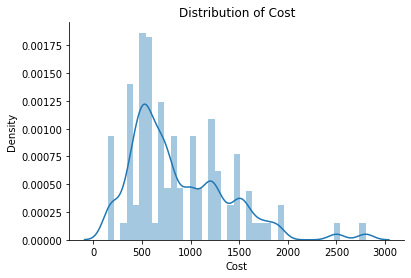

In [95]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

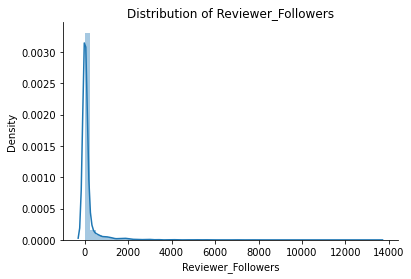

In [96]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

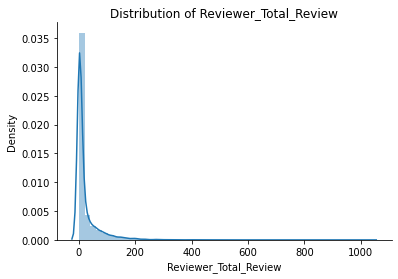

In [97]:
#distribution of Reviewer_Total_Review
sns.distplot(merged['Reviewer_Total_Review'])
plt.title("Distribution of Reviewer_Total_Review")
sns.despine()

In [98]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest

In [99]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

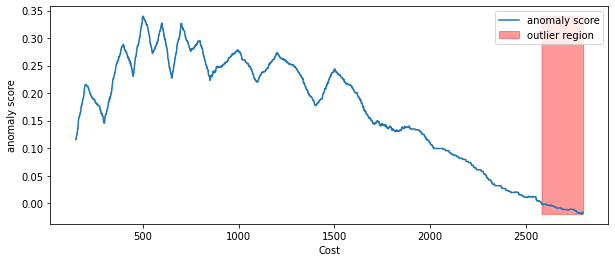

In [100]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [101]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))

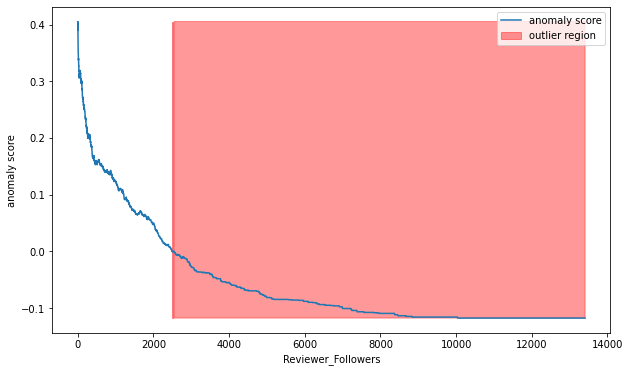

In [102]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

In [103]:
#isolation forest for anamoly detection of reviewer total review
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Total_Review'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Total_Review'] = isolation_forest.decision_function(
    merged['Reviewer_Total_Review'].values.reshape(-1, 1))
merged['outlier_univariate_Total_Review'] = isolation_forest.predict(
    merged['Reviewer_Total_Review'].values.reshape(-1, 1))

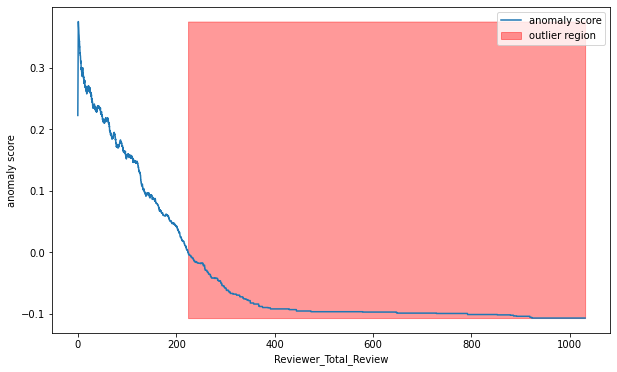

In [104]:
#chat to visualize outliers in reviwer Total review column
xx = np.linspace(merged['Reviewer_Total_Review'].min(), merged['Reviewer_Total_Review'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Total_Review')
plt.show();

Treating Outlier

In [105]:
#creating a function which will give upper whisker and lower whisker value 
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [106]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
merged.loc[merged['Cost']<= outlier_treatment_skew(df=merged,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=merged,feature='Cost')[1]

#upper limit capping
merged.loc[merged['Cost']>= outlier_treatment_skew(df=merged,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=merged,feature='Cost')[0]

In [107]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
merged.loc[merged['Reviewer_Followers']<= outlier_treatment_skew(df=merged,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=merged,feature='Reviewer_Followers')[1]

#upper limit capping
merged.loc[merged['Reviewer_Followers']>= outlier_treatment_skew(df=merged,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=merged,feature='Reviewer_Followers')[0]

In [108]:
# Restricting the data to lower and upper boundary for Reviewer Total Review in review dataset
#lower limit capping
merged.loc[merged['Reviewer_Total_Review']<= outlier_treatment_skew(df=merged,
  feature='Reviewer_Total_Review')[1], 'Reviewer_Total_Review']=outlier_treatment_skew(
      df=merged,feature='Reviewer_Total_Review')[1]

#upper limit capping
merged.loc[merged['Reviewer_Total_Review']>= outlier_treatment_skew(df=merged,
  feature='Reviewer_Total_Review')[0], 'Reviewer_Total_Review']=outlier_treatment_skew(
      df=merged,feature='Reviewer_Total_Review')[0]

**What all outlier treatment techniques have you used and why did you use those techniques?**

Since cost, reviewer follower and reviewer total review features shown positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.

**3. Categorical Encoding**

In [109]:
hotel.head()

,Restaurant,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [110]:
#total cuisine count 
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [111]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28


In [112]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [113]:
#adding cost column to the new dataset 
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [114]:
cluster_dummy.shape

(100, 46)

In [115]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican',
       'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian',
       'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food',
       'Sushi', 'Thai', 'Wraps'],
      dtype='object')

**What all categorical encoding techniques have you used & why did you use those techniques?**

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0. Benefit of using one hot encoding:

- Handling categorical variables with no ordinal relationship:

> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

4. Textual Data Preprocessing - Review

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

1. Expand Contraction

In [116]:
#creating new df for text processing of sentiment analysis
sentiment_df = reviews[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
4959,Kumar,Mathura Vilas,5.0,Mathura vilas restaurant is a really great\nWe...
7265,Varma,Labonel,4.0,The best tasting and expensive baking place\n\...


In [117]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [118]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
1466,1466,Kishore Kumar Jakkam,AB's - Absolute Barbecues,5.0,Very nice food and excellent service and hospi...
4273,4273,Ahmedconstruction2017,Karachi Cafe,5.0,"An amazing cafe by karachi bakers, each and ev..."


In [119]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 10.7 MB/s eta 0:00:00


In [120]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

2. Lower Casing

In [121]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [122]:
sentiment_df.head(2)

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...


3. Removing Punctuations

In [123]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [124]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
6949,6949,Ravi Teja Reddy,The Indi Grill,5.0,chicken wings were really good desserts collec...
7573,7573,Karishma Shaik,Royal Spicy Restaurant,5.0,good


4. Removing URLs & Removing words and digits contain digits.

In [125]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [126]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating,Location
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,"Ice Cream, Desserts",10 AM to 5 AM,2,3.94,hyderabad
53,Diners Pavilion,https://www.zomato.com/hyderabad/diners-pavili...,1200,"Chinese, Continental, Italian","12noon to 4:30pm, 6:30pm to 11:30pm (Mon, Tue,...",3,3.32,hyderabad


5. Removing Stopwords & Removing White spaces

In [127]:
#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [128]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [129]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [130]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [131]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [132]:
#random sample 
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
9833,9833,Kuldeeprules,Triptify,1.0,got cheese corn parantha ordered mexican corn
2317,2317,Chitti,Amul,5.0,delivered food ontime thanks


6. Tokenization

In [133]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [134]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
3168,3168,PK,Pista House,4.0,"[ordered, fried, chicken, biryani, awesome, li..."
8308,8308,Farhad Tarapore,GD's,3.0,"[ordered, place, since, lookout, big, fat, jui..."


7. Text Normalization

In [135]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

In [136]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
4902,4902,Ritika Shah,Mathura Vilas,1.0,"[rude, staff, bad, service, disapppinted, dece..."
8313,8313,Almas Khorrami,GD's,4.0,"[tried, mercury, burger, 🍔, cheesy, burger, ch..."


Which text normalization technique have you used and why?

I have used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

10. Text Vectorization

Tfidf

In [137]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

Bag of Words

In [138]:
!pip install gensim
import gensim
from gensim import corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict 
#tokens_dict.token2id

In [140]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

5. Feature Manipulation & Selection

1. Feature Manipulation

Restaurant

In [141]:
hotel.shape

(100, 8)

In [142]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

* Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [143]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [144]:
hotel.shape

(100, 6)

In [145]:
#creating new dataframe which will be used for clustering i.e dropping the unimportant column
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_dummy.shape

(100, 46)

In [146]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican',
       'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian',
       'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food',
       'Sushi', 'Thai', 'Wraps'],
      dtype='object')

Review Data 


In [147]:
#review column
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Review_Year', 'Review_Day', 'Review_Month', 'Review_Hour',
       'Review_Dayofweek', 'is_weekend', 'Reviewer_Total_Review',
       'Reviewer_Followers'],
      dtype='object')

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [148]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [149]:
#sentiment data frame
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
6196,6196,Roven Goutham Vanjari,Prism Club & Kitchen,5.0,"[food, booze, masti, best, price, lively, atmo...",1
3609,3609,Naveen,Banana Leaf Multicuisine Restaurant,4.0,"[time, staff, courteaus, helpfulfood, taste, g...",1


2. Feature Selection

In [150]:
hotel.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [151]:
#feature selcted for clustering 
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican',
       'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian',
       'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food',
       'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [152]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Review_Year', 'Review_Day', 'Review_Month', 'Review_Hour',
       'Review_Dayofweek', 'is_weekend', 'Reviewer_Total_Review',
       'Reviewer_Followers'],
      dtype='object')

In [153]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

What all feature selection methods have you used and why?

I will be usign **PCA for feature selection**, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

**6. Data Transformation**

<AxesSubplot:xlabel='Cost', ylabel='Density'>

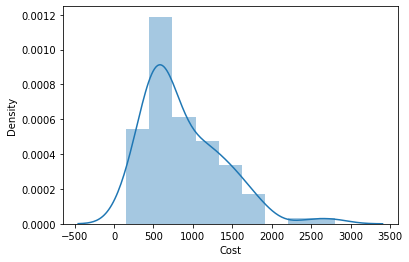

In [154]:
sns.distplot(cluster_dummy['Cost'])

In [155]:
from scipy.stats import norm
from scipy import stats

In [156]:
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

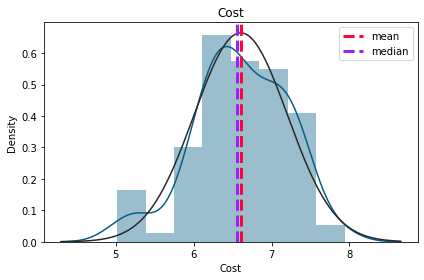

In [157]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_dummy[col], color = '#055E85', fit = norm);
    feature = cluster_dummy[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

**7. Data Scaling**

In [158]:
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
83,GD's,6.216606,3.960,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,eat.fit,6.216606,3.200,4,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
82,Al Saba Restaurant,6.621406,3.155,5,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
57,Being Hungry,6.111467,3.660,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
58,Tempteys,5.860786,3.850,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_dff = cluster_dummy.copy()
scaled_dff[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

Which method have you used to scale you data and why?

* Here I have used standard scaler as those numerical columns where normally distributed.

**8. Dimesionality Reduction**

In [161]:
#principal component analysis
from sklearn.decomposition import PCA

In [162]:
 #Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_dff.set_index(['Restaurant'],inplace=True)
features = scaled_dff.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA() 

# fit PCA on features
pca.fit(scaled_dff[features])

PCA()

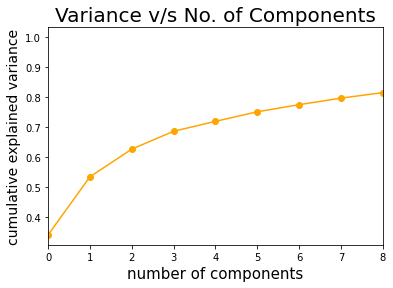

In [163]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15)
plt.ylabel('cumulative explained variance',size = 14)
plt.title('Variance v/s No. of Components',size = 20)
plt.xlim([0, 8])
plt.show()

In [164]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_dff[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_dff[features])

Explained variation per principal component: [0.34156824 0.19361694 0.09216748]
Cumulative variance explained by 3 principal components: 62.74%


In [165]:
#shape
print("original shape: ", scaled_dff.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 45)
transformed shape: (100, 3)


Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible. It is a technique used to overcome the curse of dimensionality, which refers to the problem of increased computational complexity and decreased performance of machine learning models as the number of features increases.

There are two main types of dimensionality reduction techniques: feature selection and feature extraction.

Feature selection is the process of selecting a subset of the most relevant features from the original feature set. It is a technique that helps to reduce the dimensionality of the data by removing irrelevant and redundant features. Common feature selection techniques include:

* Correlation-based feature selection
* Mutual information-based feature selection
* Recursive feature elimination
* SelectKBest

Feature extraction is the process of creating new features from the original feature set by combining or transforming the existing features. It is a technique that helps to reduce the dimensionality of the data by creating a new feature space that is more compact and informative than the original feature space. Common feature extraction techniques include:

* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Independent Component Analysis (ICA)
* Non-Negative Matrix Factorization (NMF)
* Autoencoder

Both feature selection and feature extraction can be used to reduce the dimensionality of the data and improve the performance of machine learning models. However, the choice of technique depends on the specific task, the data, and the computational resources available.

Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques PCA can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset?

I have used PCA as dimension reduction technique, because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

Another advantage of PCA is that it is a linear technique, which means it can be applied to data that have a linear relationship between features. It is also easy to interpret the results as the principal components can be thought of as new, uncorrelated features. Additionally, PCA can be used for data visualization by projecting high-dimensional data onto a 2D or 3D space for easy visualization.


When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

When PCA is applied after k-means, it is used to visualize the clusters in a lower-dimensional space. The k-means algorithm is applied to the original data, resulting in clusters that are defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualize and interpret the clusters. The advantage of this approach is that the clusters can be easily interpreted in the original feature space. However, it may not be as effective in removing noise and correlated features from the data.



9. Data Splitting

In [166]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [167]:
sentiment_df.shape

(9962, 6)

In [168]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7969, 17328)
Number transactions y_train dataset:  (7969,)
Number transactions X_test dataset:  (1993, 17328)
Number transactions y_test dataset:  (1993,)


What data splitting ratio have you used and why?

I have used 80:20 split which is one the most used split ratio. Since there was only 9962 data, therefore I have used more in training set.

10. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [169]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns = 
            {'index':'Sentiment','Sentiment':'Count'})

In [170]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [171]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.7019256848386222

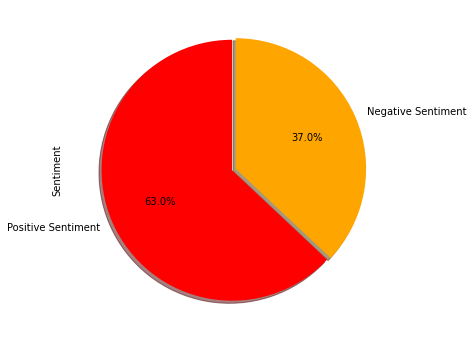

In [172]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','orange'],
                               explode=[0.01,0.02]
                              )
plt.show()

What technique did you use to handle the imbalance dataset and why? (If needed to be balanced?

Yes, there is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.70 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance.

#*7. ML Model Implementation*

ML Model - 1 Clustering

KMeans Clustering

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

**ELBOW METHOD**

> This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. 

**SILHOUETTE METHOD**

> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

In [173]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [174]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

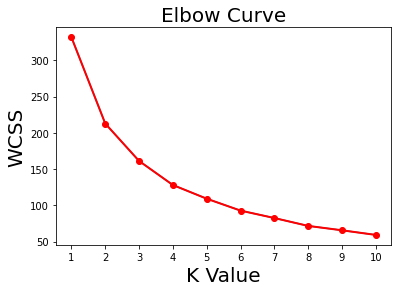

In [175]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20)
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20)
plt.title('Elbow Curve', size = 20)
plt.show()

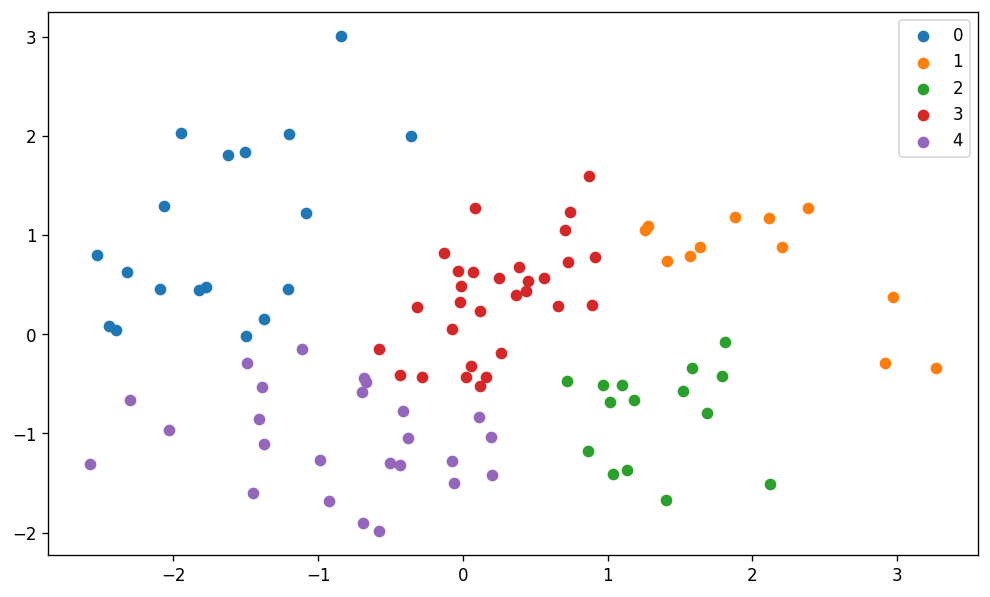

In [176]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [177]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_dff.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
eat.fit,0.197821,-1.040864,0.409691,4
Cream Stone,1.279736,1.093496,0.814395,1


In [178]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Labonel,6.908755,3.915,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
KS Bakers,5.303305,3.965,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
The Tilt Bar Republic,1500.0,3.845,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Driven Cafe,600.0,3.745,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3


In [180]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6,4
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3,0
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.0,4.66,4,0
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.0,3.21,5,4
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.0,4.34,5,0


In [181]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,label,Total_Restaurant
4,1,12
3,2,15
2,0,18
1,4,25
0,3,30


In [182]:
#creating new df for checking cuisines in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
10,Sardarji's Chaats & More,North Indian,400.0,3.250,3,2
70,Urban Asia - Kitchen & Bar,Momos,1100.0,3.650,5,4
18,10 Downing Street,Continental,1900.0,3.800,3,0
57,Being Hungry,North Indian,450.0,3.660,2,3
9,Cream Stone,Desserts,350.0,3.845,2,1


In [183]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*100)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra'
 'Hyderabadi' 'Spanish' 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Momos'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Continental' 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American'
 'Italian' 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 2 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Desserts' 'Kebab' 'Cafe' 'Pizza'] 

Cuisine List for Cluster : 3 

['Continental' 'American' 'Chinese' 'North Indian' 'Itali

Agglomerative Hierarchical Clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering** 
> The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

**Dendrogram in Hierarchical clustering**

> The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

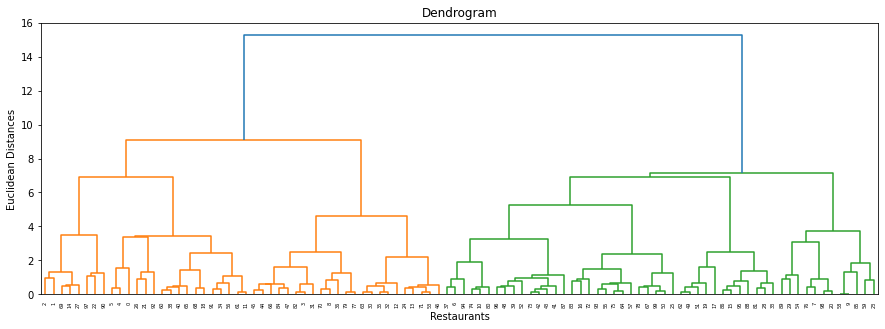

In [184]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [186]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2944512185798735
For n_clusters = 3, silhouette score is 0.22470296855636585
For n_clusters = 4, silhouette score is 0.20712443238211795
For n_clusters = 5, silhouette score is 0.2452731176924435
For n_clusters = 6, silhouette score is 0.2704873038594552
For n_clusters = 7, silhouette score is 0.26633628790088276
For n_clusters = 8, silhouette score is 0.2796135403025008
For n_clusters = 9, silhouette score is 0.2863537849281547
For n_clusters = 10, silhouette score is 0.2869415750506099
For n_clusters = 11, silhouette score is 0.29752517862419997
For n_clusters = 12, silhouette score is 0.3132113947314933
For n_clusters = 13, silhouette score is 0.3140322068639454
For n_clusters = 14, silhouette score is 0.32519814149365245
For n_clusters = 15, silhouette score is 0.3321855591889877


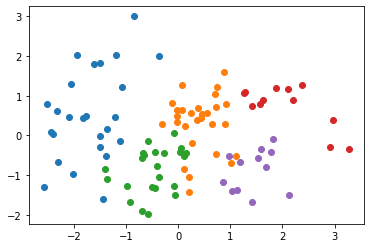

Silhouette Coefficient: 0.245
davies_bouldin_score 1.152


In [187]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [188]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc

In [189]:
clustering_result.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label,label_hr
8,Hyper Local,"American, Chinese, North Indian, Kebab, South ...",1000.0,3.64,5,4,2
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3,0,0
7,Shah Ghouse Spl Shawarma,Lebanese,300.0,3.43,1,1,3
5,The Fisherman's Wharf,"Seafood, Goan, North Indian, Continental, Asian",1500.0,4.22,5,0,0
51,Hitech Bawarchi Food Zone,"Biryani, North Indian, Chinese",500.0,3.05,3,2,4


 **K-means** and **hierarchical clustering** are two different methods for grouping data points into clusters. K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it. Hierarchical clustering, on the other hand, is a linkage-based method, where clusters are defined by the similarity of data points. Because these methods use different criteria to define clusters, the labels they assign to data points can be different. Additionally, the number of clusters and initialization of the algorithm can also affect the outcome, which can cause the labels to differ.

1. Explain the ML Model

**KMeans Clustering**
> I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 5 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

**Agglomerative Hierarchical Clustering**
> I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 5 and then vizualized the clusters and the datapoints within it.

ML Model - 2 Sentiment Analysis

In [190]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

In [191]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

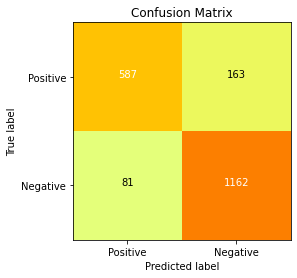

[[ 587  163]
 [  81 1162]]
Metric        Score
---------  --------
ROC AUC    0.858751
Precision  0.876981
Recall     0.934835
F1         0.904984
Accuracy   0.877572


In [192]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 587 instances are labeled as True Positive (correctly predicted as positive)
* 163 instances are labeled as False Positive (incorrectly predicted as positive)
* 1162 instances are labeled as True Negative (correctly predicted as negative)
* 81 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [193]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

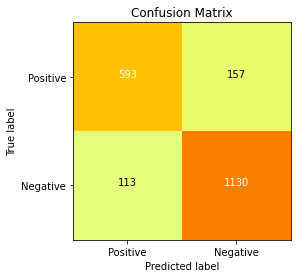

[[ 593  157]
 [ 113 1130]]
Metric        Score
---------  --------
ROC AUC    0.849879
Precision  0.878011
Recall     0.909091
F1         0.893281
Accuracy   0.864526


In [194]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 593 instances are labeled as True Positive (correctly predicted as positive)
* 157 instances are labeled as False Positive (incorrectly predicted as positive)
* 1130 instances are labeled as True Negative (correctly predicted as negative)
* 113 instances are labeled as False Negative (incorrectly predicted as negative)

2. Cross- Validation & Hyperparameter Tuning

**Logistic Regression**

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


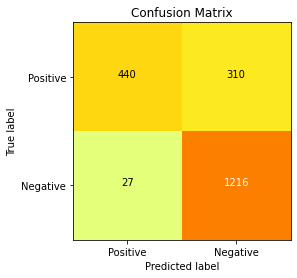

[[ 440  310]
 [  27 1216]]
Metric        Score
---------  --------
ROC AUC    0.782473
Precision  0.796855
Recall     0.978278
F1         0.878295
Accuracy   0.830908


In [197]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 440 instances are labeled as True Positive (correctly predicted as positive)
* 310 instances are labeled as False Positive (incorrectly predicted as positive)
* 1216 instances are labeled as True Negative (correctly predicted as negative)
* 27 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [198]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[11:03:28] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.896 total time=   5.6s
[11:03:33] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.905 total time=   3.6s
[11:03:37] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.908 total time=   3.6s
[11:03:40] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.900 total time=   6.4s
[11:03:47] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.906 total time=   4.4s
[11:03:51] WARNING: ../src/lea

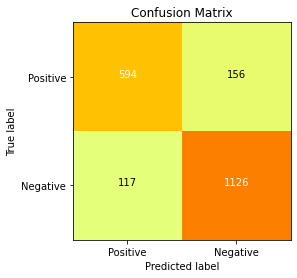

[[ 594  156]
 [ 117 1126]]
Metric        Score
---------  --------
ROC AUC    0.848936
Precision  0.878315
Recall     0.905873
F1         0.891881
Accuracy   0.863021


In [199]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 594 instances are labeled as True Positive (correctly predicted as positive)
* 156 instances are labeled as False Positive (incorrectly predicted as positive)
* 1126 instances are labeled as True Negative (correctly predicted as negative)
* 117 instances are labeled as False Negative (incorrectly predicted as negative)

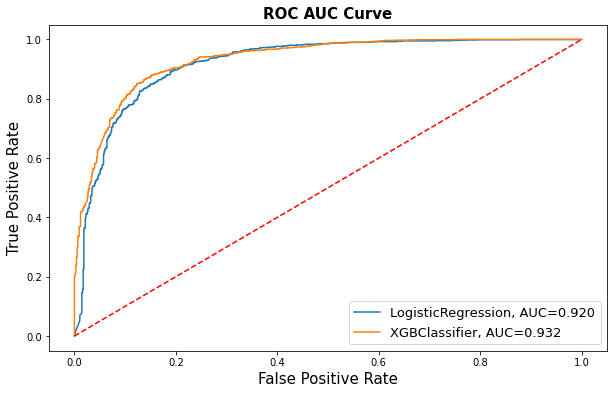

In [200]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Overall for XgBoost Classifier there is a improvement i.e., it changes from 

- Metric        Score           
---------  --------
- ROC AUC   -  0.849879
- Precision -  0.878011
- Recall    -  0.909091
- F1        -  0.893281
- Accuracy  - 0.864526



to this ▶ 

- Metric        Score       
---------  --------
- ROC AUC   - 0.848936
- Precision - 0.878315
- Recall    - 0.905873
- F1        - 0.891881
- Accuracy  - 0.863021

and after tunning 
* 594 instances are labeled as True Positive (correctly predicted as positive)
* 156 instances are labeled as False Positive (incorrectly predicted as positive)
* 1126 instances are labeled as True Negative (correctly predicted as negative)
* 117 instances are labeled as False Negative (incorrectly predicted as negative)

3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

4. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. 

* XGBoost is highly regularized, which helps to prevent overfitting, making it more robust to unseen data. As a supervised learning algorithm, XGBoost can be trained on labeled data to predict sentiment labels.

* XGBoost's ensemble nature can help to improve the performance of sentiment analysis by combining the predictions of multiple models.

* XGBoost's regularization can help to prevent overfitting and make the model more robust to unseen data, which is important in sentiment analysis where the model needs to generalize to new data.

* XGBoost's speed and efficiency can be beneficial in sentiment analysis, where large datasets are common and the model needs to make predictions quickly.

* XGBoost's built-in feature selection mechanism can be used to automatically select the most important features in a dataset, which can be useful in sentiment analysis where the data is high dimensional and it is important to focus on the most relevant features.

* XGBoost's gradient-boosted decision trees algorithm can be highly effective in sentiment analysis as it can learn complex relationships between features and sentiment labels.

XGBoost's ensemble nature, regularization, speed, feature selection, and gradient-boosted decision tree algorithm make it a powerful tool for sentiment analysis.

#*Conclusion*

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved. 

Other important discoveries during analysis are - 
* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

* restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Some recommendation based on the analysis ▶
* Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to imporve customer satisfaction.

* Based on the clustering, or user interaction customer should be given recommendations.

* Also use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.

### ***Hurrah! The Machine Learning Capstone Project is Done !!!🎯***